#**Author: Sachet Utekar**

#**Myntra Product - Image Search** 

##**Downloading Dataset**

In [1]:
!wget -O myntra_train.zip https://techlearn-cdn.s3.amazonaws.com/bs_myntra_image_search/myntra_train.zip #zip format

--2021-09-06 15:29:39--  https://techlearn-cdn.s3.amazonaws.com/bs_myntra_image_search/myntra_train.zip
Resolving techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)... 52.219.66.84
Connecting to techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)|52.219.66.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87508395 (83M) [application/x-zip-compressed]
Saving to: ‘myntra_train.zip’

myntra_train.zip    100%[===================>]  83.45M  18.2MB/s    in 5.4s    

2021-09-06 15:29:45 (15.5 MB/s) - ‘myntra_train.zip’ saved [87508395/87508395]



In [2]:
!unzip -q myntra_train.zip #unziping the zipped dataset 

replace train/dress/009b3c31-fb62-45c0-be9a-37a5c238cb88.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


##**Importing Libraries**

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input 

from sklearn.neighbors import NearestNeighbors

##**Loading Dataset**

In [4]:
train_dr  = '/content/train'
img_size = 224
batch_size = 64

img_gen_train = ImageDataGenerator(preprocessing_function = preprocess_input)
train_datagen = img_gen_train.flow_from_directory(train_dr, target_size = (img_size, img_size), 
                                                  class_mode = None, 
                                                  shuffle = False)

Found 3068 images belonging to 10 classes.


##**Loading ResNet50**

In [5]:
model = ResNet50(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_size, img_size, 3),
                 pooling = 'max')

##**Generating Product Attributes**

In [6]:
feature_list = model.predict(train_datagen)

In [7]:
filenames = [train_dr + '/' + s for s in train_datagen.filenames]

##**Using KNN on Product Features**

In [8]:
neighbors = NearestNeighbors(n_neighbors = 3,
                             algorithm = 'ball_tree',
                             metric = 'euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

#**Image Search**

##**Downloading Test Images**

In [9]:
#Downloading Test Images

!wget -O test1.jpg https://techlearn-cdn.s3.amazonaws.com/bs_myntra_image_search/test1.jpg
!wget -O test2.jpg https://techlearn-cdn.s3.amazonaws.com/bs_myntra_image_search/test2.jpg
!wget -O test3.jpg https://techlearn-cdn.s3.amazonaws.com/bs_myntra_image_search/test3.jpg

--2021-09-06 15:36:27--  https://techlearn-cdn.s3.amazonaws.com/bs_myntra_image_search/test1.jpg
Resolving techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)... 52.219.158.11
Connecting to techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)|52.219.158.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18807 (18K) [image/jpeg]
Saving to: ‘test1.jpg’

test1.jpg           100%[===================>]  18.37K  --.-KB/s    in 0.1s    

2021-09-06 15:36:28 (140 KB/s) - ‘test1.jpg’ saved [18807/18807]

--2021-09-06 15:36:28--  https://techlearn-cdn.s3.amazonaws.com/bs_myntra_image_search/test2.jpg
Resolving techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)... 52.219.158.11
Connecting to techlearn-cdn.s3.amazonaws.com (techlearn-cdn.s3.amazonaws.com)|52.219.158.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19551 (19K) [image/jpeg]
Saving to: ‘test2.jpg’

test2.jpg           100%[===================>] 

##**Pre-processing the Image**

In [10]:
#Pre-processing the Image

img_path = 'test1.jpg'
input_shape = (img_size, img_size, 3) #Setting Image Size
img = image.load_img(img_path, target_size = (input_shape[0], input_shape[1])) #Resizing the Image

image_array = image.img_to_array(img) #Converting to an array of elements
expanded_image_array = np.expand_dims(image_array, axis = 0)

preprocessed_img = preprocess_input(expanded_image_array)

##**Predicting Similar Images**

In [11]:
#Predicting Similar Images

test_img_features = model.predict(preprocessed_img, batch_size = 1)

_, indices = neighbors.kneighbors(test_img_features)

##**Making a custom function for Similar Images** 

In [12]:
def similar_images(indices):
    plt.figure(figsize=(15,10), facecolor='white')
    plotnumber = 1    
    for index in indices:
        if plotnumber<=len(indices) :
            ax = plt.subplot(2,4,plotnumber)
            plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos')            
            plotnumber += 1
    plt.tight_layout()

##**Calling the function and displaying the Predictions for the Original Image**

<IPython.core.display.Javascript object>

**Original Image**

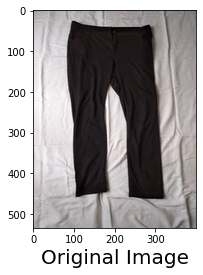

<IPython.core.display.Javascript object>

**Predictions for the Image**

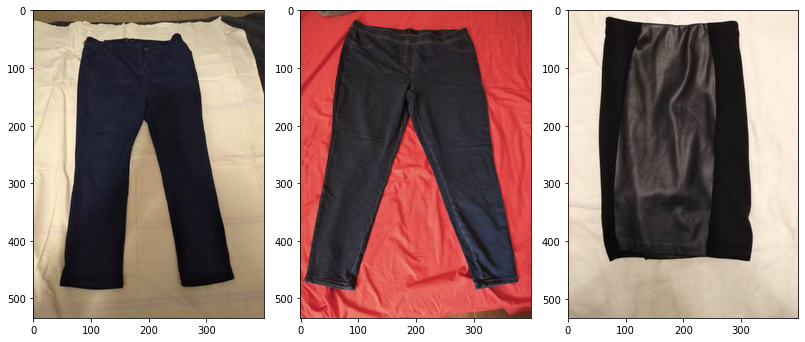

In [15]:
increase_font()
printmd('**Original Image**')
print()
plt.imshow(mpimg.imread(img_path), interpolation = 'lanczos')
plt.xlabel('Original Image',fontsize = 20)
plt.show()
print()
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '30px'
      break
    }
  }
  '''))
increase_font()
printmd('**Predictions for the Image**')
print()
similar_images(indices[0])